<a href="https://colab.research.google.com/github/joooser/TENSORFLOW2/blob/main/Tumor_classiffier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import os
import zipfile

In [26]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/TumorClassification.zip \
    -O /tmp/platzi-tf2/TumorClassification.zip

--2022-06-09 02:40:29--  https://storage.googleapis.com/platzi-tf2/TumorClassification.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.128, 108.177.12.128, 172.217.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7460028 (7.1M) [application/zip]
Saving to: ‘/tmp/platzi-tf2/TumorClassification.zip’

/tmp/platzi-tf2/Tum 100%[===================>]   7.11M  --.-KB/s    in 0.04s   

2022-06-09 02:40:29 (160 MB/s) - ‘/tmp/platzi-tf2/TumorClassification.zip’ saved [7460028/7460028]



In [27]:
local_zip = "/tmp/platzi-tf2/TumorClassification.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/platzi-tf2")
zip_ref.close()

In [28]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import requests as requests
from PIL import Image
from io import BytesIO
import codecs
import json


In [29]:
train_dir = "/tmp/platzi-tf2/Train"
test_dir = "/tmp/platzi-tf2/Test"

In [30]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split= 0.2)

In [31]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale"
)

Found 1050 images belonging to 3 classes.
Found 28 images belonging to 3 classes.
Found 144 images belonging to 3 classes.


In [32]:
classes = ["BENIGN", "MALIGNANT", "NORMAL"]

In [33]:
classes

['BENIGN', 'MALIGNANT', 'NORMAL']

In [34]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (10, 10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

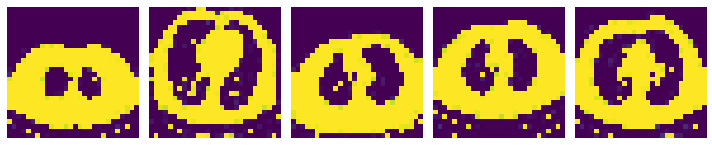

In [35]:
sample_training_images, _= next(train_generator)
plotImages(sample_training_images[:5])

In [36]:
model_base = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
              tf.keras.layers.Dense(256, activation = "relu"),
              tf.keras.layers.Dense(128, activation = "relu"),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

In [37]:
model_base.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 3)                 387       
                                                                 
Total params: 234,243
Trainable params: 234,243
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_base.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])


history = model_base.fit(
    train_generator, 
    epochs= 20, 
    validation_data = validation_generator
)

Epoch 1/20
9/9 [==============================] - 1s 90ms/step - loss: 0.9426 - accuracy: 0.5314 - val_loss: 1.1026 - val_accuracy: 0.6429
Epoch 2/20
9/9 [==============================] - 1s 70ms/step - loss: 0.6126 - accuracy: 0.7505 - val_loss: 1.4550 - val_accuracy: 0.5714
Epoch 3/20
9/9 [==============================] - 1s 68ms/step - loss: 0.4129 - accuracy: 0.8495 - val_loss: 1.6721 - val_accuracy: 0.6429
Epoch 4/20
9/9 [==============================] - 1s 67ms/step - loss: 0.2767 - accuracy: 0.9152 - val_loss: 1.9415 - val_accuracy: 0.6429
Epoch 5/20
9/9 [==============================] - 1s 72ms/step - loss: 0.1694 - accuracy: 0.9610 - val_loss: 2.1452 - val_accuracy: 0.6429
Epoch 6/20
9/9 [==============================] - 1s 70ms/step - loss: 0.1023 - accuracy: 0.9857 - val_loss: 2.4724 - val_accuracy: 0.6429
Epoch 7/20
9/9 [==============================] - 1s 68ms/step - loss: 0.0580 - accuracy: 0.9990 - val_loss: 2.8736 - val_accuracy: 0.6429
Epoch 8/20
9/9 [===========

In [39]:
results = model_base.evaluate(test_generator)

2/2 [==============================] - 0s 16ms/step - loss: 3.3466 - accuracy: 0.5903


In [40]:
def visualizacion_resultados(history):
  epochs = [i for i in range(20)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()

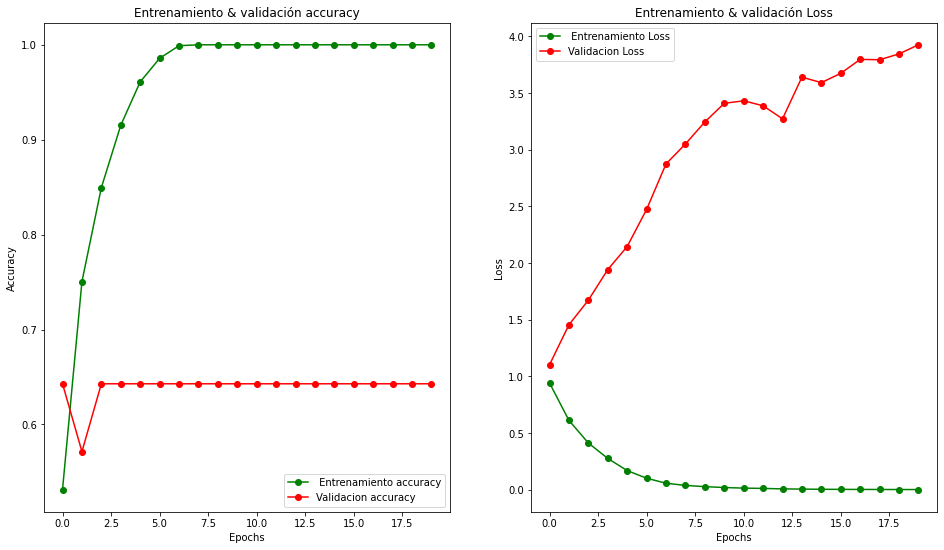

In [41]:
visualizacion_resultados(history)

In [42]:
from tensorflow.keras import regularizers

In [43]:
model_optimizer = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "softmax"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "softmax"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "sigmoid")
])

model_optimizer.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 3)                 387       
                                                                 
Total params: 234,243
Trainable params: 234,243
Non-tr

In [44]:
model_optimizer.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_optimizer = model_optimizer.fit(
    train_generator,
    epochs = 50,
    validation_data = validation_generator
)

Epoch 1/50
9/9 [==============================] - 1s 90ms/step - loss: 1.1043 - accuracy: 0.3029 - val_loss: 1.1034 - val_accuracy: 0.2857
Epoch 2/50
9/9 [==============================] - 1s 73ms/step - loss: 1.1031 - accuracy: 0.3381 - val_loss: 1.1031 - val_accuracy: 0.2857
Epoch 3/50
9/9 [==============================] - 1s 72ms/step - loss: 1.1020 - accuracy: 0.3295 - val_loss: 1.1024 - val_accuracy: 0.2857
Epoch 4/50
9/9 [==============================] - 1s 71ms/step - loss: 1.1009 - accuracy: 0.3514 - val_loss: 1.1014 - val_accuracy: 0.2857
Epoch 5/50
9/9 [==============================] - 1s 91ms/step - loss: 1.0997 - accuracy: 0.3714 - val_loss: 1.1003 - val_accuracy: 0.2857
Epoch 6/50
9/9 [==============================] - 1s 73ms/step - loss: 1.0987 - accuracy: 0.4057 - val_loss: 1.0995 - val_accuracy: 0.2857
Epoch 7/50
9/9 [==============================] - 1s 72ms/step - loss: 1.0975 - accuracy: 0.4171 - val_loss: 1.0985 - val_accuracy: 0.3214
Epoch 8/50
9/9 [===========

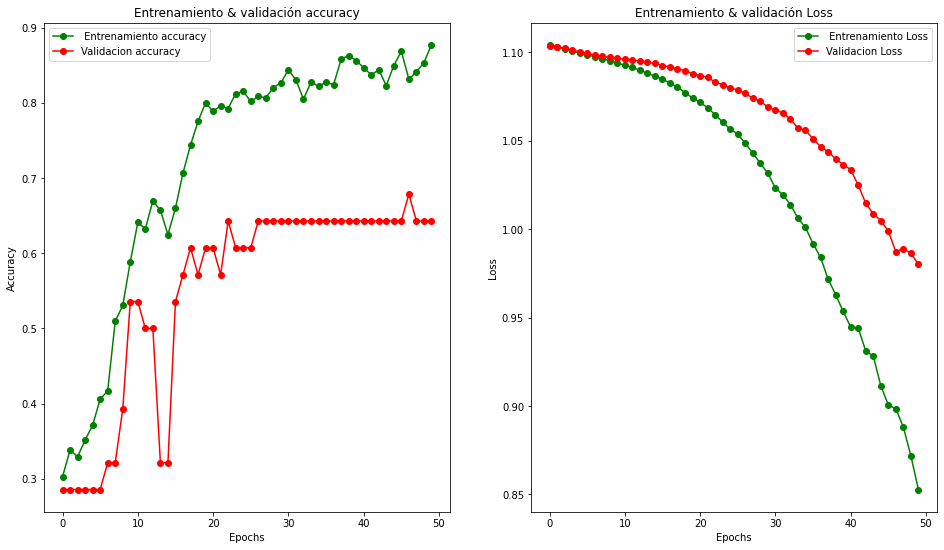

In [47]:
def visualizacion_resultados(history):
  epochs = [i for i in range(50)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()

visualizacion_resultados(history_optimizer)